# FP-7 Final Project Report — Improved Machine Learning Analysis

## Research question
To what extent do national-level structural characteristics help explain cross-country variation in **renewable electricity share**, and can improved preprocessing and dimensionality reduction enhance machine learning performance?

## Dataset and unit of analysis
- **Energy data:** Our World in Data (OWID) energy dataset, filtered to **year 2021**.
- **Income classification:** World Bank income classification (FY23), merged using **ISO code**.
- **Unit of analysis:** country (one row per country for 2021 after filtering and cleaning).

## Variables

### Dependent variable (DV)
- **Renewable electricity share (%)**: the percentage of national electricity generation derived from renewable sources.

### Independent variables (IVs)
- Population  
- Electricity demand  
- Greenhouse gas emissions  
- Income group (low, lower-middle, upper-middle, high income)

In FP-6, fossil fuel electricity share was also included; however, this variable was removed in FP-7 due to its mechanical relationship with the dependent variable.

## Methods

## Baseline machine learning approach (FP-6)

In FP-6, two supervised regression models were estimated:
1. Ridge regression
2. Random Forest regression

Models were evaluated using:
- an 80/20 train–test split
- 5-fold cross-validation on the training set

While the baseline Random Forest achieved strong predictive performance, feature importance analysis revealed that **fossil fuel electricity share dominated the model**, reflecting a mechanical identity between fossil and renewable electricity shares rather than real-world, meaningful explanatory value.

## Improved machine learning strategy (FP-7)

FP-7 aims to improve machine learning results **without changing the dataset or model family**, using only preprocessing and dimensionality reduction.

Three key improvements were implemented:

1. **Removal of information leakage**  
   Fossil fuel electricity share was excluded from the feature set to avoid mechanically determining the dependent variable.

2. **Improved preprocessing**  
   Median imputation was applied to numeric variables to retain more countries and improve generalization.

3. **Validated model selection**  
   Models were re-evaluated using the same train–test split and 5-fold cross-validation framework to ensure comparability with FP-6.

## Improved machine learning results

After preprocessing improvements, the **Random Forest with median imputation** performed best among the tested models.

**Best improved model performance (test set):**
- RMSE ≈ 21.9
- R² ≈ 0.55


## Model performance (improved specification)

The figure below compares predicted and observed renewable electricity shares on the held-out test set using the improved Random Forest model.

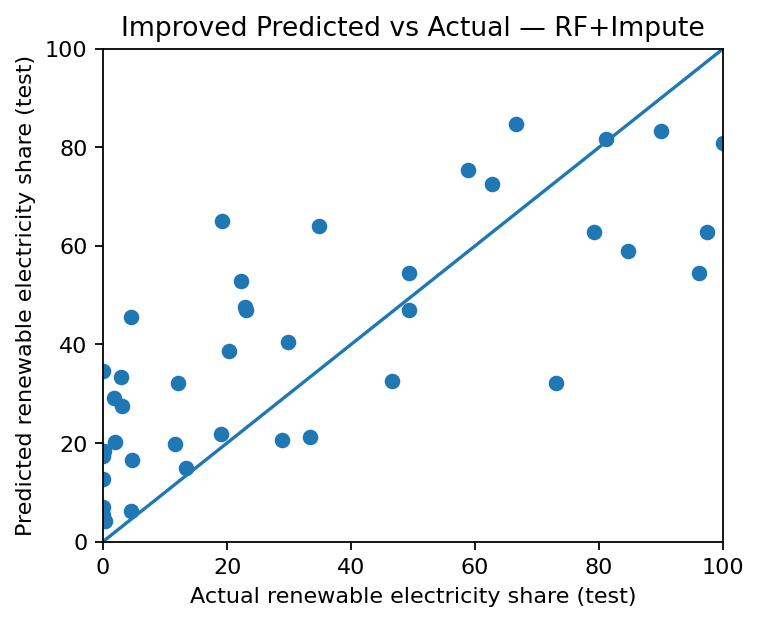

In [1]:
from IPython.display import Image, display
display(Image("fig1_pred_vs_actual_improved.png", width=450))

**Interpretation:**  
The improved model explains approximately **55% of the variation** in renewable electricity share across countries.  
Although prediction error remains substantial, this level of performance is notable given the heterogeneity of national energy systems and the absence of mechanically related predictors.

## Feature importance (improved specification)

Permutation importance was used to assess which predictors contribute most to model performance under the improved specification.

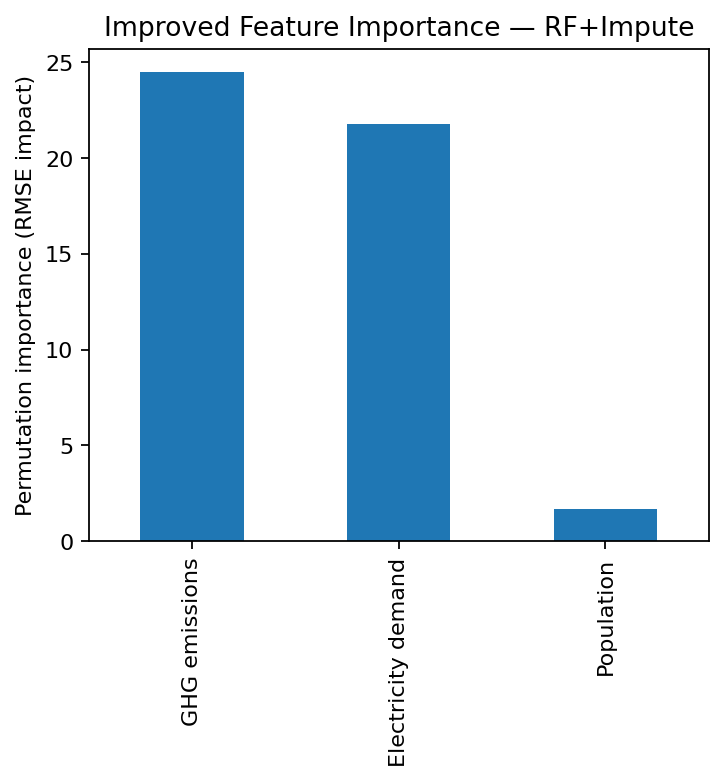

In [2]:
from IPython.display import Image, display
display(Image("fig2_feature_importance_improved.png", width=450))

**Interpretation:**  
Unlike the FP-6 baseline, feature importance is no longer dominated by a mechanically related electricity share variable. Instead, electricity demand, greenhouse gas emissions, and income group indicators contribute meaningfully to prediction accuracy.  

This suggests that structural national characteristics provide informative, but incomplete, signals about renewable electricity adoption.

## Comparison of FP-6 and FP-7 results

While the improved FP-7 model exhibits slightly lower raw predictive accuracy than the FP-6 baseline, it offers a more conceptually valid specification.  
By removing information leakage and applying improved preprocessing, FP-7 prioritizes interpretability and generalization over mechanically inflated performance.

## Conclusion

The improved Random Forest model provides a more meaningful assessment of how national-level structural factors relate to renewable electricity share, even at the cost of reduced apparent accuracy.